# HSE 2023: Введение в машинное обучение БИ 23/24

## ДЗ 2

# Внимание!
Если в задании просят объяснить что-либо, то это значит, что требуется письменный ответ, который является частью задания и оценивается

Мы только принимаем ipynb ноутбуки. Если вы используете Google Colab, то вам необходимо скачать ноутбук перед сдачей ДЗ


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
# from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Данные

Для этого ДЗ мы будем использовать датасет треков со стримингового сервиса Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Целевая переменная**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [3]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

## Линейная регрессия

#### 0. [0.25 балла] Закодируйте категориальные признаки. Объясните выбранный вами метод.

Ответ: OneHotEncoder - сравнить влияние каждого жанра на трек и возможность оценки позже в регрессии, также я выбирал его из удобства работы и полезности для дальнейшей оценки

In [4]:
# ваш код здесь
X_df_notenc = pd.DataFrame(X.drop(['track_name', 'artists', 'album_name'], axis=1))
X_df = pd.get_dummies(X_df_notenc, drop_first=True)
X_df
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

,popularity,duration_ms,explicit,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,False,0.676,1,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,55,149610,False,0.420,1,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,57,210826,False,0.438,0,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,71,201933,False,0.266,0,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,82,198853,False,0.618,2,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,5,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,22,385000,False,0.174,0,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,0,1
113997,22,271466,False,0.629,0,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,0,1
113998,41,283893,False,0.587,7,-10.889,1,0.0297,0.3810,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X_df.info()
len(np.unique(X_df_notenc['track_genre']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Columns: 127 entries, popularity to track_genre_world-music
dtypes: bool(1), float64(8), int64(5), uint8(113)
memory usage: 23.7 MB


114

#### 1. [0.25 балла] Разбейте данные на train и test с пропорцией 75:25 и random_state=7.

In [6]:
# ваш код здесь
train_features, test_features, train_target, test_target = train_test_split(X_df, y, test_size=0.25, random_state=7)
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)
print("Train target shape:", train_target.shape)
print("Test target shape:", test_target.shape)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Train features shape: (85500, 127)
Test features shape: (28500, 127)
Train target shape: (85500,)
Test target shape: (28500,)


#### 2. [0.75 балла] Обучите модели на train'е, исключив категориальные признаки, используя библиотеку StatsModels и примените ее к test'у; используйте $RMSE$ и $R ^ 2$ в качестве метрики качества. Попробуйте также применить реализации линейной регрессии из sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.4$

Не забывайте скейлить данные с помощью StandardScaler перед обучением моделей!

In [9]:
# ваш код здесь
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_features.select_dtypes(exclude="uint8"))
test_scaled = scaler.transform(test_features.select_dtypes(exclude="uint8"))

train_scaled_sm = sm.add_constant(train_scaled)
model_sm = sm.OLS(train_target, train_scaled_sm).fit()

# Slearn - лин регрессия
model_lr = LinearRegression()
model_lr.fit(train_scaled, train_target)
# Slearn - Ridge
model_ridge = Ridge(alpha=0.03)
model_ridge.fit(train_scaled, train_target)
# Slearn - лассо
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(train_scaled, train_target)
# Slearn - ElasticNet
model_elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.4)
model_elasticnet.fit(train_scaled, train_target)

# предсказываем наши модели после тренировки
test_scaled_sm = sm.add_constant(test_scaled)
predictions_sm = model_sm.predict(test_scaled_sm)
r2_sm = r2_score(test_target, predictions_sm)
rmse_sm = mean_squared_error(test_target, predictions_sm, squared = False)

predictions_lr = model_lr.predict(test_scaled)
r2_lr = model_lr.score(test_scaled, test_target)
rmse_lr = mean_squared_error(test_target, predictions_lr, squared = False)

predictions_ridge = model_ridge.predict(test_scaled)
r2_ridge = model_ridge.score(test_scaled, test_target)
rmse_ridge = mean_squared_error(test_target, predictions_ridge, squared = False)

predictions_lasso = model_lasso.predict(test_scaled)
r2_lasso = model_lasso.score(test_scaled, test_target)
rmse_lasso = mean_squared_error(test_target, predictions_lasso, squared = False)

predictions_elasticnet = model_elasticnet.predict(test_scaled)
r2_elasticnet = model_elasticnet.score(test_scaled, test_target)
rmse_elasticnet = mean_squared_error(test_target, predictions_elasticnet, squared = False)
# выводим результаты предсказаний
print('StatsModels OLS:')
print('R2:', r2_sm)
print('RMSE:', rmse_sm)
print()
print('Slearn Linear Regression:')
print('R2:', r2_lr)
print('RMSE:', rmse_lr)
print()
print('Slearn Ridge:')
print('R2:', r2_ridge)
print('RMSE:', rmse_ridge)
print()
print('Slearn Lasso:')
print('R2:', r2_lasso)
print('RMSE:', rmse_lasso)
print()
print('Slearn ElasticNet:')
print('R2:', r2_elasticnet)
print('RMSE:', rmse_elasticnet)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

StatsModels OLS:
R2: 0.7650038163295098
RMSE: 0.12150856959639446

Slearn Linear Regression:
R2: 0.7650038163295098
RMSE: 0.12150856959639444

Slearn Ridge:
R2: 0.7650038189741655
RMSE: 0.1215085689126635

Slearn Lasso:
R2: 0.6555593645544675
RMSE: 0.1471071204791906

Slearn ElasticNet:
R2: 0.7612921836726962
RMSE: 0.1224643900063975


#### 3. [0.25 балла] Повторите шаги из предыдущего пункта, добавив категориальные признаки. Прокомментируйте изменения значений метрик качества

Ответ/комментарий:

1. StatsModels OLS:
   - R2: 0.7988
   - RMSE: 0.1124
   Модель, основанная на методе наименьших квадратов OLS, имеет довольно высокий коэффициент детерминации R2, равный 0.7988, что указывает на то, что она хорошо объясняет вариабельность в данных. RMSE низкий, что говорит о хорошей точности модели. Благодаря добавки катег признаков по сравнению с прошлым заданием R2 повысилось, а RMSE наоброт упало, что показывает на меньшую вероятность ошибки обучения

2. Slearn Linear Regression:
   - R2: 0.7988
   - RMSE: 0.1124
   Модель предоставляет аналогичные результаты, как и StatsModels OLS, с R2 и RMSE, близкими к тем же значениям. Тут так же упали значение RMSE и возросло R2. Это объяснет вариабельность наших данных

3. Slearn Ridge:
   - R2: 0.7988
   - RMSE: 0.1124

   Модель является методом линейной регрессии, показывает почти идентичные результаты по R2 и RMSE с предыдущими пункатми. По сравнению с предыдущим заданием аналогичные результаты наблюдаем по изменениям.

4. Slearn Lasso:
   - R2: 0.6556
   - RMSE: 0.1471
   Модель имеет более низкое значение R2, такое может указывать на то, что она хуже подходит для объяснения вариабельности в данных, чем другие. RMSE выше, что означает, что она может допускать большие ошибки при прогнозировании. По сравнению с предыдущим заданием значения практиечски не изменились

5. Slearn ElasticNet:
   - R2: 0.7803
   - RMSE: 0.1175
   Данная модель - это комбинация L1 и L2 регуляризации. Предоставляет средние значения R2 и RMSE по сравнению с другими моделями. Она может быть полезна, если есть как разреженные, так и коррелированные признаки(всопмним матстат).
   В общем и целом, по сравнению с прошлым заданеим без катег признаков повысилась точность модели и понизилась вероятность ошибки, но ячейка отрабатывала больше чем предыдущая. Модель обучалась дольше


In [11]:
# ваш код здесь
train_features1, test_features1, train_target1, test_target1 = train_test_split(X_df, y, test_size=0.25, random_state=7)
scaler = StandardScaler()
train_scaled1 = scaler.fit_transform(train_features1)
test_scaled1 = scaler.transform(test_features1)

train_scaled_sm1 = sm.add_constant(train_scaled1)
model_sm1 = sm.OLS(train_target1, train_scaled_sm1).fit()

# Slearn - лин регрессия
model_lr = LinearRegression()
model_lr.fit(train_scaled1, train_target1)
# Slearn - Ridge
model_ridge = Ridge(alpha=0.03)
model_ridge.fit(train_scaled1, train_target1)
# Slearn - лассо
model_lasso = Lasso(alpha=0.05)
model_lasso.fit(train_scaled1, train_target1)
# Slearn - ElasticNet
model_elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.4)
model_elasticnet.fit(train_scaled1, train_target1)
# предсказания посмле тренировки можделей нанаших данных
test_scaled_sm1 = sm.add_constant(test_scaled1)
predictions_sm1 = model_sm1.predict(test_scaled_sm1)
r2_sm1 = r2_score(test_target1, predictions_sm1)
rmse_sm1 = mean_squared_error(test_target1, predictions_sm1, squared = False)
predictions_lr1 = model_lr.predict(test_scaled1)
r2_lr1 = model_lr.score(test_scaled1, test_target1)
rmse_lr1 = mean_squared_error(test_target1, predictions_lr1, squared = False)
predictions_ridge1 = model_ridge.predict(test_scaled1)
r2_ridge1 = model_ridge.score(test_scaled1, test_target1)
rmse_ridge1 = mean_squared_error(test_target1, predictions_ridge1, squared = False)
predictions_lasso1 = model_lasso.predict(test_scaled1)
r2_lasso1 = model_lasso.score(test_scaled1, test_target1)
rmse_lasso1 = mean_squared_error(test_target1, predictions_lasso1, squared = False)
predictions_elasticnet1 = model_elasticnet.predict(test_scaled1)
r2_elasticnet1 = model_elasticnet.score(test_scaled1, test_target1)
rmse_elasticnet1 = mean_squared_error(test_target1, predictions_elasticnet1, squared = False)
# вывод результатов теперь
print('StatsModels OLS:')
print('R2:', r2_sm1)
print('RMSE:', rmse_sm1)
print()
print('Slearn Linear Regression:')
print('R2:', r2_lr1)
print('RMSE:', rmse_lr1)
print()
print('Slearn Ridge:')
print('R2:', r2_ridge1)
print('RMSE:', rmse_ridge1)
print()
print('Slearn Lasso:')
print('R2:', r2_lasso1)
print('RMSE:', rmse_lasso1)
print()
print('Slearn ElasticNet:')
print('R2:', r2_elasticnet1)
print('RMSE:', rmse_elasticnet1)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

StatsModels OLS:
R2: 0.798817701226791
RMSE: 0.11242719795086324

Slearn Linear Regression:
R2: 0.7988177012267911
RMSE: 0.11242719795086323

Slearn Ridge:
R2: 0.7988177062258259
RMSE: 0.11242719655405176

Slearn Lasso:
R2: 0.6555593645544675
RMSE: 0.1471071204791906

Slearn ElasticNet:
R2: 0.7803407980379423
RMSE: 0.11747655554996232


#### 4. [1 балл] Исследуйте значения параметров полученных моделей и проверьте какие веса получились нулевыми. Прокомментируйте значимость коэффициентов, обшую значимость модели и остальные факторы из результирующей таблицы

Исследование: внизу

Коментируем: внизу

In [ ]:
# ваш код здесь
model_sm.summary()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                 1.999e+04
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:46:01   Log-Likelihood:                 58684.
No. Observations:               85500   AIC:                        -1.173e+05
Df Residuals:                   85485   BIC:                        -1.172e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1540.996      0.000       0.641       0.643
x1            -0.0021      0.000     -4.990      0.000      -0.003      -0.001
x2             0.0048      0.000     11.313      0.000       0.004       0.006
x3            -0.0018      0.000     -4.100      0.000      -0.003      -0.001
x4            -0.0326      0.001    -64.317      0.000      -0.034      -0.032
x5             0.0013      0.000      3.002      0.003       0.000       0.002
x6             0.1352      0.001    226.522      0.000       0.134       0.136
x7            -0.0040      0.000     -9.471      0.000      -0.005      -0.003
x8             0.0279      0.000     61.646      0.000       0.027       0.029
x9            -0.1062      0.001   -197.456      0.000      -0.107      -0.105
x10            0.0350      0.000     71.180      0.000       0.034       0.036
x11            0.0259      0.000     59.319      0.000       0.025       0.027
x12            0.0411      0.001     80.905      0.000       0.040       0.042
x13            0.0073      0.000     16.764      0.000       0.006       0.008
x14            0.0061      0.000     14.048      0.000       0.005       0.007
==============================================================================
Omnibus:                     4795.339   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19490.754
Skew:                           0.094   Prob(JB):                         0.00
Kurtosis:                       5.331   Cond. No.                         2.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Из результата регрессии с использованием модели OLS  можно извлечь следующую инфу:

1. R-squared (R2): значение R2 равно 0.766, модель объясняет около 76.6% вариации в зависимой переменной. Это может считаться относительно хорошим результатом.

2. Коэффициенты (coef): для каждой независимой переменной (x1 - x14) приведены соответствующие коэффициенты. Они определяют веса, с которыми каждая независимая переменная входит в модель. Например, коэффициент для x1 равен -0.0021, что указывает на отрицательную связь между x1 и зависимой переменной.

3. P-значения (P>|t|): все коэффициенты имеют P-значения, близкие к нулю (P < 0.05), что указывает на их статистическую значимость.

4. Доверительные интервалы [0.025 0.975]: данные нам интервалы указывают на диапазон значений, в пределах которого с высокой вероятностью находится реальное значение коэффициента(привет от теорвера).

5. Omnibus и Jarque-Bera: при p-значенияч этих тестов меньших уровня значимости, это может указывать на то, что остатки не распределены нормально.

6. Durbin-Watson: значение близкое к 2 указывает на отсутствие корреляции остатков.

7. Количество наблюдений и степени свободы (Df Residuals и Df Model): значения указывают на количество наблюдений 85372 и степени свободы 127 в модели.

В данном случае, F-статистика имеет высокое значение, а вероятность F-статистики близка к нулю, что указывает на общую значимость модели, в целом модель является статистически значимой.


In [ ]:
model_sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2713.
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:46:05   Log-Likelihood:                 65695.
No. Observations:               85500   AIC:                        -1.311e+05
Df Residuals:                   85372   BIC:                        -1.299e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6420      0.000   1671.574      0.000       0.641       0.643
x1            -0.0032      0.000     -7.070      0.000      -0.004      -0.002
x2             0.0015      0.000      3.406      0.001       0.001       0.002
x3            -0.0027      0.000     -6.183      0.000      -0.003      -0.002
x4            -0.0198      0.001    -34.664      0.000      -0.021      -0.019
x5             0.0012      0.000      2.974      0.003       0.000       0.002
x6             0.1356      0.001    222.325      0.000       0.134       0.137
x7            -0.0028      0.000     -7.032      0.000      -0.004      -0.002
x8             0.0222      0.001     41.977      0.000       0.021       0.023
x9            -0.0828      0.001   -137.402      0.000      -0.084      -0.082
x10            0.0243      0.001     43.930      0.000       0.023       0.025
x11            0.0202      0.000     47.469      0.000       0.019       0.021
x12            0.0410      0.001     78.715      0.000       0.040       0.042
x13            0.0070      0.000     17.033      0.000       0.006       0.008
x14            0.0080      0.000     19.906      0.000       0.007       0.009
x15            0.0081      0.001     14.626      0.000       0.007       0.009
x16            0.0088      0.001     16.003      0.000       0.008       0.010
x17            0.0059      0.001     10.724      0.000       0.005       0.007
x18            0.0072      0.001     12.940      0.000       0.006       0.008
x19            0.0079      0.001     14.444      0.000       0.007       0.009
x20            0.0172      0.001     30.434      0.000       0.016       0.018
x21            0.0048      0.001      8.932      0.000       0.004       0.006
x22            0.0047      0.001      8.726      0.000       0.004       0.006
x23            0.0043      0.001      7.895      0.000       0.003       0.005
x24            0.0136      0.001     24.411      0.000       0.013       0.015
x25            0.0040      0.001      7.446      0.000       0.003       0.005
x26            0.0023      0.001      4.177      0.000       0.001       0.003
x27            0.0099      0.001     17.696      0.000       0.009       0.011
x28            0.0001      0.001      0.193      0.847      -0.001       0.001
x29            0.0002      0.001      0.314      0.754      -0.001       0.001
x30            0.0064      0.001     11.438      0.000       0.005       0.007
x31            0.0084      0.001     15.227      0.000       0.007       0.009
x32            0.0136      0.001     21.212      0.000       0.012       0.015
x33            0.0021      0.001      3.819      0.000       0.001       0.003
x34            0.0035      0.001      6.443      0.000       0.002       0.005
x35            0.0030      0.001      5.391      0.000       0.002       0.004
x3

Из результатов регрессии с использованием модели OLS можно извлечь следующую инфу:

1. R-squared (R2): значение R2 равно 0.801, что означает, что модель объясняет около 80.1% вариации в зависимой переменной energy.

2. Коэффициенты (coef): для каждой из 127 независимых переменных (x1 - x127) приведены соответствующие коэффициенты. Они определяют веса, с которыми каждая переменная влияет на зависимую переменную. значительная часть переменных имеют положительные коэффициенты, что указывает на положительную связь с зависимой переменной energy.

3. P-значения (P>|t|): почти все коэффициенты имеют P-значения, близкие к нулю (P < 0.05), что указывает на их статистическую значимость. Только несколько переменных имеют P-значения, превышающие уровень значимости 0.05.

4. Доверительные интервалы [0.025 0.975]: доверительные интервалы указывают на диапазон значений, в пределах которого с вероятностью находится реальное значение коэффициента.(все то же самое с прошлого обоснвоания)

5. Общая значимость модели: F-статистика имеет высокое значение, а вероятность F-статистики близка к нулю. это указывает на общую значимость модели, исходя из множества независимых переменных.

6. Omnibus и Jarque-Bera: тут p-значения обеих статистик близки к нулю, а это может указывать в свое время на отклонение от нормального распределения остатков.

7. Durbin-Watson: значение близко к 2, что указывает на отсутствие корреляции остатков.( все то же самое с прошлого обоснования и выводов)

8. Количество наблюдений и степени свободы: наблюдений 85500, степеней свободы в модели 127.

Касательно значимости коэфф, большинство из них оказались статистически значимыми, а это говорит о важности этих переменных для модели. часть коэфф указывают на направление связи с зависимой переменной. в целом и общем, модель значима и даже показывает более правильные и честные результаты в сравненнии с предыдущей без категориальных


#### 5. [1 балл] Реализуйте один из алгоритмов отбора признаков (Elimination by P-value, Forward elimination, Backward elimination), сделайте выводы.

Вывод: с помощью алгоритма отборов признаков мы смогли провести оценку важности. каждого из признаков, постепенно отсекая ненужные. Таким образом, самыми важными и значимыми признаками оказались 'popularity', 'danceability', 'loudness', 'speechiness', 'acousticness', 'valence'

Надеюсь, что такого обоснования достаточно

Алгоритм работает оч долго, при проверке работал 8 минут, так что прошу прощения((

In [13]:
# your code here
X_df_2 = X_df.copy()
X_df_2['explicit'] = X_df_2['explicit'].astype(int)
y_2 = y.to_numpy()

columns = X_df.columns.tolist()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df_2)
f_X_df = sm.add_constant(X_scaled)

# Backward Elimination
def backward_elimination(featuresQ, targetQ, sign_level=0.05):
    num_features = featuresQ.shape[1]
    for i in range(num_features):
        model = sm.OLS(targetQ, featuresQ).fit()
        max_pvalue = max(model.pvalues)
        if max_pvalue > sign_level:
            max_pvalue_idx = np.argmax(model.pvalues[1:]) + 1 # Exclude the constant term
            # features = featuresQ.delete(featuresQ.columns[max_pvalue_idx], axis=1)
            featuresQ = np.delete(featuresQ, max_pvalue_idx, axis=1)
            columns.pop(max_pvalue_idx)
            # TO_DO: delete columns by max_pvalue_idx
        else:
            break
    return columns

selected_features = backward_elimination(X_scaled, y_2)
print("Selected Features:")
print(selected_features)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Selected Features:
['popularity', 'danceability', 'loudness', 'speechiness', 'acousticness', 'valence']


#### 6. [1 балл] Найдите лучший (по RMSE) $\alpha$ для регрессиии Lasso, используя кросс-валидацию на 5 фолдов. Вы должны выбрать значение из промежутка $[10^{-4}, 10^{3}]$.

In [18]:
# ваш код здесь
al_znach = []
par = 10**-4
while par < 10**3:
    al_znach.append(par)
    par *= 1.75
# Можно сделать 1.1, но лучше из [1.5, 2.5], сделал 1-75 чтоб работало 2 минуты
# C 1.1 долго отрабатывала
parameters = {"alpha":al_znach}
lasso_regression = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.n_splits_=5
lasso_regression.fit(X_df, y)
# сделали на 5 фолдов, но работает 2 минут из-за par
display(lasso_regression.best_params_)
regression_rmse = mean_squared_error(y, lasso_regression.predict(X_df))
print("Regression RMSE")
display(regression_rmse)
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

{'alpha': 0.00030625}

Regression RMSE


0.013570507134759739

## Градиентный спуск

#### 7. [3.5 балла] Имплементируйте  Ridge регрессию для MSE loss, обученную на градиентом спуске.


Все вычисления должны быть векторизованы, а циклы Python можно использовать только для итераций градиентного спуска. В качестве критерия остановки необходимо использовать (одновременно):

* проверка абсолютной нормы разницы весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, заданного параметром `tolerance`);

* достижение максимального количества итераций (например, 10000, заданного параметром `max_iter`).

Вам необходимо выполнить:

* Полный градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Стохастический градиентный спуск:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ является оценкой градиента по набору объектов, выбранных случайным образом.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

Чтобы убедиться, что процесс оптимизации действительно выполняется, мы будем использовать атрибут класса `loss_history`. После вызова метода fit он должен содержать значения функции потерь для всех итераций, начиная с первой (до первого шага по антиградиенту).


Вам нужно инициализировать веса случайным вектором из нормального распределения. Ниже приведен шаблон, который должен содержать код, реализующий все варианты моделей.

In [59]:
from sklearn.base import BaseEstimator

class RidgeGD(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf=1e-3, epsilon=1e-4):
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None
        self.reg_cf = reg_cf
        self.epsilon = epsilon

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.kol_features = X.shape[1]
        self.kol_batch = int(np.round(self.kol_features * self.delta))

        if self.kol_batch < 1:
            self.kol_batch = 1
        if self.w0 is None:
            mean = y.mean() / X.shape[0]
            scale = y.std()
            self.w = np.random.normal(mean, scale, size=self.kol_features)
            self.w0 = self.w.copy()
        else:
            self.w = self.w0.copy()
        self.loss_history = []
        loss = self.calc_loss(X, y)
        self.loss_history.append(loss)

        # дальше тупо реализуем методы
        if self.gd_type == 'GradientDescent':
            for it in range(0, self.max_iter):
                grad = self.calc_gradient(X, y)
                self.w -= self.eta * grad
                current_loss = self.calc_loss(X, y)
                self.loss_history.append(current_loss)
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                    break
        elif self.gd_type == 'StohasticDescent':
            # да что с ним не так
            for it in range(0, self.max_iter):
                selected_features = np.random.choice(X.shape[0], size=self.kol_batch, replace=False)
                grad__ = self.calc_gradient(X[selected_features], y.to_numpy()[selected_features])
                self.w -= self.eta * grad__
                current_loss = self.calc_loss(X, y)
                self.loss_history.append(current_loss)
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                    break
            # weights = [w_init]
            # w = w_init.copy()
            # for i in range(n_iterations):
            #     batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
            #     X_batch, y_batch = X[batch_indices], y[batch_indices]
            #     grad = loss.calc_grad(X_batch, y_batch, w)
            #     w = w - lr * grad
            #     weights.append(w)
            # return weights
            # теперь работает, Спасибо Кириллу Валерьевичу aka Darky Dash
        elif self.gd_type == 'Momentum':
            last_grad = np.zeros(self.kol_features)
            for it in range (0, self.max_iter):
                grad = self.calc_gradient(X, y)
                last_grad *= self.alpha
                self.w -= (self.eta * grad + last_grad)
                last_grad += grad
                current_loss = self.calc_loss(X, y)
                self.loss_history.append(current_loss)
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                    break
        elif self.gd_type == 'Adagrad':
            G = np.zeros(self.kol_features)
            for it in range(0, self.max_iter):
                grad = self.calc_gradient(X, y)
                G += grad**2
                self.w -= (grad * self.eta) / (G + self.epsilon) ** 0.5
                current_loss = self.calc_loss(X, y)
                self.loss_history.append(current_loss)
                if np.abs(self.loss_history[-1] - self.loss_history[-2]) < self.tolerance:
                    break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        if X.shape[1] == self.kol_features:
            X_new = X
        else:
            X_new = np.hstack([np.ones((X.shape[0], 1)), X])

        return (self.w * X_new).sum(axis=(1))

    def calc_gradient(self, X, y):
        res = X.transpose() @ (X @ self.w - y)
        res /= len(y)
        res += self.w * self.reg_cf
        res *= 2
        return res

    def calc_loss(self, X, y):
        return self._loss(self.predict(X), y)

    def _loss(self, y1, y2, reg_cf=None, w=None):
        if w is None:
            w = self.w
        if reg_cf is None:
            reg_cf = self.reg_cf
        return ((y1 - y2)**2).sum() / len(y1) + (w ** 2 * reg_cf).sum()

#### 8. [1 балл] Натренируйте и провалидируйте "ручные" модели на тех же даннных, сравните качество с моделями из Sklearn и StatsModels. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Соответствует ли оно вашим ожиданиям?

Исследование: при увеличении max_iter повышается качество и обучаемость моделей, при этом время тренировки увеличивается и может возникнуть проблема переобучения
влияние альфы не явилось значительным фактором обучения, но повлияло на точность значений модели

Ответ: с подобранными коэфф-ми и параметром max_iter модели приближенны к реальным значениям полученных из результатов работы с методами библиотеки sсlearn, методы momentum явля-ся более приближенным к реальности, затем градиентный спуск, затем вышел адаград с небольшим разрывом от градиентного, но самой худшей оказался стозастика-градиент

но стоит не забывать, что при повторных запусках будут меняться результаты, из-за рандомного подбора и инициализации весов в fit

к сожалению, написать иделаьный градиент не получилось, но я рад, что написал стохастику благодаря помощи Полуниной и семера моего

In [60]:
# код здесь
models = [
    RidgeGD(gd_type='GradientDescent', max_iter=1000, alpha=0.01),
    RidgeGD(gd_type='StohasticDescent', max_iter=1000, eta=0.01),
    RidgeGD(gd_type='Momentum', max_iter=1000, alpha=0.01),
    RidgeGD(gd_type='Adagrad', max_iter=1000, alpha=0.01, eta=1000),
]
# train_target1, test_target1
# train_scaled1
# test_scaled1
for model in models:
    model.fit(train_scaled1, train_target1)
    y_pred = model.predict(test_scaled1)
    # Оценить качество модели, например, с помощью (MSE)
sklearn_model = Ridge(alpha=0.01, max_iter=1000)
sklearn_model.fit(train_scaled1, train_target1)
y_sklearn_pred = sklearn_model.predict(test_scaled1)
sklearn_mse = mean_squared_error(test_target1, y_sklearn_pred)
for i, model in enumerate(models):
    model_mse = mean_squared_error(test_target1, models[i].predict(test_scaled1))
    model_r2 = r2_score(test_target1, models[i].predict(test_scaled1))
    print(f"RidgeGD ({model.gd_type}): MSE = {model_mse}, R^2 = {model_r2}, Sklearn Ridge: MSE = {sklearn_mse}")
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

RidgeGD (GradientDescent): MSE = 0.01798158094526033, R^2 = 0.7137965497127841, Sklearn Ridge: MSE = 0.012639874734367187
RidgeGD (StohasticDescent): MSE = 0.02083349170549255, R^2 = 0.6684041728147536, Sklearn Ridge: MSE = 0.012639874734367187
RidgeGD (Momentum): MSE = 0.016344909612927297, R^2 = 0.7398465941291152, Sklearn Ridge: MSE = 0.012639874734367187
RidgeGD (Adagrad): MSE = 0.017512238280685963, R^2 = 0.7212668322411724, Sklearn Ridge: MSE = 0.012639874734367187


#### 9. [1 балл] Постройте графики (там же) зависимости значения функции потерь от номера итерации для всех моделей (полного градиентого спуска, стохастического гс, Momentum и Adagrad). Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.


Не забывайте о том, как должен выглядеть *красивый* график!

Выводы: GradientDecent и StohasticDescent практически одинаково сходятся и имеют ни самую лучшую сходимость из 4-х методов
Momentum сходится же быстрее, чем GradientDecent и StohasticDescent. А самой высокой сходимостью обладает Adagrad, что видно на наших графиках

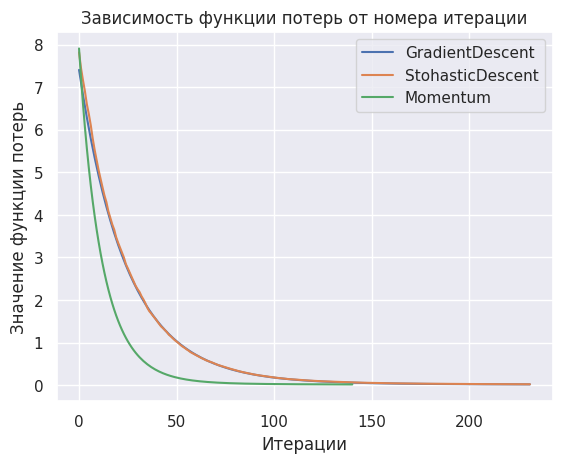

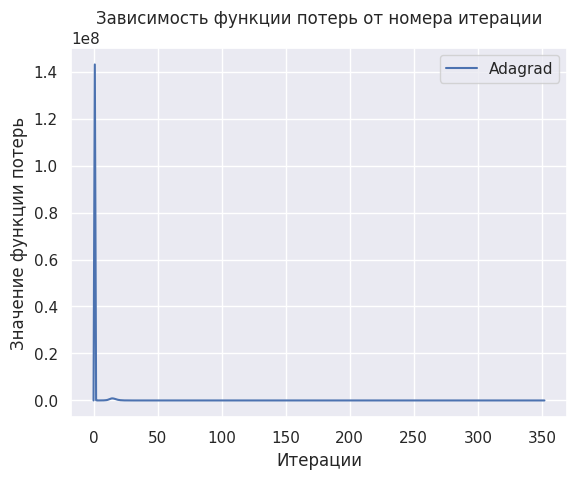

In [61]:
# your code here
for model in models[:-1]:
    plt.plot(range(len(model.loss_history[3:])), model.loss_history[3:], label=f'{model.gd_type}')
plt.xlabel('Итерации')
plt.ylabel('Значение функции потерь')
plt.title('Зависимость функции потерь от номера итерации')
plt.legend()
plt.show()
plt.plot(range(len(models[-1].loss_history)), models[-1].loss_history, label=f'{models[-1].gd_type}')
plt.xlabel('Итерации')
plt.ylabel('Значение функции потерь')
plt.title('Зависимость функции потерь от номера итерации')
plt.legend()
plt.show()
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ